In [16]:
# Import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [9]:
# using request download the data from ibm web site object storage

import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Error downloading file: {response.status_code}")

In [11]:
# read the data using pandas and show the first 5 (0-4) rows
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [12]:
# show the statistical information
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [13]:
#since this is a classification types of ML (categorical), lets check number of categories/class in the custcat (y or output) 
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [14]:
# in our data, the customer groups was divided into:
# 1-Basic services
# 2- E-services
# 3- Plus services
# 4- Total services
# So in the case above, 281 people uses Plus services, 266 uses Basic services, 236 uses Total services, 217 uses E-services.
# Our goal is to build a classifier model for prediting an unknown services, using the k nearest neighbour algorithm
# K nearest neighbour uses the highest occurance in a place as the prediction for unknown case

array([[<Axes: title={'center': 'income'}>]], dtype=object)

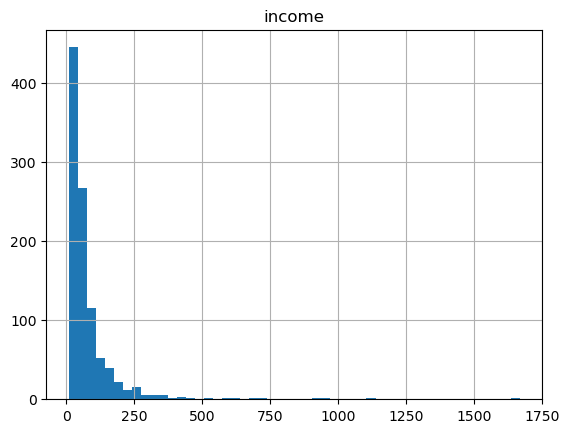

In [15]:
# Visualizing with histogram the distribution for the different independent variable(income, age, gender)
df.hist(column='income', bins=50)

array([[<Axes: title={'center': 'age'}>]], dtype=object)

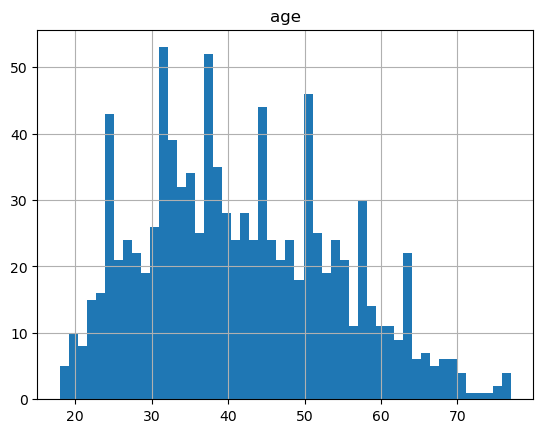

In [26]:
df.hist(column='age', bins=50)

In [29]:
# Lets get the exact column names
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [32]:
# lets get the X (INDEPENDENT VARIABLE) names and convert to numpy array and applying slicing operation to extract elements from the arrays
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [33]:
# Lets do same for Y (DEPENDENT VARIABLE)
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [34]:
# let's apply standization method to normalize the X(INDEPENDENT) data to have zero means and unit variance
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [35]:
# Lets split the data into training and testing; 20% of the data for testing

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [37]:
# import K nearest neighbor (KNN) algorithm to build the classification model
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Let train our data, using K=4 ie considering 4 closest neighbor. Note you can use more than 4.
# The model consider's what neighbourhood has the highest category, and then predicts the unknown to be 
# in that category/class

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [42]:
# Lets make prediction with our trained data
y_train_pred = neigh.predict(X_train)
y_train_pred[0:5]

array([3, 3, 3, 1, 2], dtype=int64)

In [43]:
# Lets make prediction with our test data
y_test_pred = neigh.predict(X_test)
y_test_pred[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [46]:
# lets evaluate the accuracy of our prediction
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [47]:
# Training accuracy is appox 55%
# Testing accuracy is 32%
# model accuracy in the training should perform better than testing because the data are already seen for the training
# While the testing is a new data, it's performance determines the prediction strength of the model.
# Model performance should be above 70%, to be considered as good model
# The KNN modelis a non parametric lazy learning algorithm that doesn't really learn much from a data during training
# Hence it shoudn't always the employed to build a prediction model
